# <strong><font color='#3399FF'>📌 Extracción</font></strong> 
---

## <font color='#0066CC'>Extracción de datos</font>
---

Creamos una función que nos ayude a obtener el archivo JSON de la API o de forma local si es necesario.

In [588]:
import requests
import json

def cargarDatos() -> list[dict]:
    """
    Carga el arhivo json original de la empresa Telecom X desde la API o el archivo local de respaldo.

    Return:
    - Lista de diccionarios.
    """
    try:
        print("Función de carga de archivo iniciada.")
        print("\nCargando archivo desde API.")
        url_raw_api = 'https://raw.githubusercontent.com/ingridcristh/challenge2-data-science-LATAM/refs/heads/main/TelecomX_Data.json'
        request_api = requests.get(url=url_raw_api)
        telecom_dicc = json.loads(request_api.text)

    except Exception as e:
        print("No fue posible cargar el archivo. Verifique la excepción.")
        print(f'Excepción: {e}')
        print(f'URL API: {url_raw_api}')

        print("\nCargando archivo localmente.")
        try: 
            with open(file='TelecomX_Data.json', mode='r') as file:
                telecom_x_dicc = json.loads(file.read())
            print("Archivo cargado con éxito localmente.")    
            return telecom_x_dicc
        except Exception as e:
            print("No fue posible cargar el archivo. Verifique la excepción.")
            print(f'Excepción: {e}')        

    else:
        print("Archivo cargado con éxito desde API.")    
        return telecom_dicc
    finally:
        print("\nFunción terminada.")

In [589]:
telecom_x_dicc = cargarDatos()
telecom_x_dicc

Función de carga de archivo iniciada.

Cargando archivo desde API.


Archivo cargado con éxito desde API.

Función terminada.


[{'customerID': '0002-ORFBO',
  'Churn': 'No',
  'customer': {'gender': 'Female',
   'SeniorCitizen': 0,
   'Partner': 'Yes',
   'Dependents': 'Yes',
   'tenure': 9},
  'phone': {'PhoneService': 'Yes', 'MultipleLines': 'No'},
  'internet': {'InternetService': 'DSL',
   'OnlineSecurity': 'No',
   'OnlineBackup': 'Yes',
   'DeviceProtection': 'No',
   'TechSupport': 'Yes',
   'StreamingTV': 'Yes',
   'StreamingMovies': 'No'},
  'account': {'Contract': 'One year',
   'PaperlessBilling': 'Yes',
   'PaymentMethod': 'Mailed check',
   'Charges': {'Monthly': 65.6, 'Total': '593.3'}}},
 {'customerID': '0003-MKNFE',
  'Churn': 'No',
  'customer': {'gender': 'Male',
   'SeniorCitizen': 0,
   'Partner': 'No',
   'Dependents': 'No',
   'tenure': 9},
  'phone': {'PhoneService': 'Yes', 'MultipleLines': 'Yes'},
  'internet': {'InternetService': 'DSL',
   'OnlineSecurity': 'No',
   'OnlineBackup': 'No',
   'DeviceProtection': 'No',
   'TechSupport': 'No',
   'StreamingTV': 'No',
   'StreamingMovies': 

In [590]:
import pandas as pd

telecom_x_raw = pd.DataFrame(data=telecom_x_dicc)
telecom_x_raw.head()

,customerID,Churn,customer,phone,internet,account
0,0002-ORFBO,No,"{'gender': 'Female', 'SeniorCitizen': 0, 'Part...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'One year', 'PaperlessBilling': '..."
1,0003-MKNFE,No,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'Yes'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
2,0004-TLHLJ,Yes,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
3,0011-IGKFF,Yes,"{'gender': 'Male', 'SeniorCitizen': 1, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
4,0013-EXCHZ,Yes,"{'gender': 'Female', 'SeniorCitizen': 1, 'Part...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."


Podemos obervar que tenemos varias columnas con diccionarios anidados.

# <strong><font color='#3399FF'>🔧 Transformación</font></strong> 
---

## <font color='#0066CC'>Conoce el conjunto de datos</font>
---

Es recomendable leer el diccionario de datos 'TelecomX_diccionario.md' y compararlo con las columnas iniciales del DataFrame, DF de ahora en adelante, 'telecom_x_raw'.

In [591]:
telecom_x_raw.dtypes

customerID    object
Churn         object
customer      object
phone         object
internet      object
account       object
dtype: object

In [592]:
telecom_x_raw.customer.loc[0]

{'gender': 'Female',
 'SeniorCitizen': 0,
 'Partner': 'Yes',
 'Dependents': 'Yes',
 'tenure': 9}

In [593]:
telecom_x_raw.phone.loc[0]

{'PhoneService': 'Yes', 'MultipleLines': 'No'}

In [594]:
telecom_x_raw.internet.loc[0]

{'InternetService': 'DSL',
 'OnlineSecurity': 'No',
 'OnlineBackup': 'Yes',
 'DeviceProtection': 'No',
 'TechSupport': 'Yes',
 'StreamingTV': 'Yes',
 'StreamingMovies': 'No'}

In [595]:
telecom_x_raw.account.loc[0]

{'Contract': 'One year',
 'PaperlessBilling': 'Yes',
 'PaymentMethod': 'Mailed check',
 'Charges': {'Monthly': 65.6, 'Total': '593.3'}}

Podemos concluir que la mayoría de columnas (excepto 'customerID' y 'Churn') contienen diccionarios anidados, por lo que procederemos a desempaquetar dichas columnas para tener un mejor panorama del DF.

Es importante que recalquemos que el método 'json_normalize' trabaja con un diccionario o una lista de diccionarios.

In [596]:
telecom_x_normalizado = pd.json_normalize(data=telecom_x_dicc)
telecom_x_normalizado.head()

,customerID,Churn,customer.gender,customer.SeniorCitizen,customer.Partner,customer.Dependents,customer.tenure,phone.PhoneService,phone.MultipleLines,internet.InternetService,...,internet.OnlineBackup,internet.DeviceProtection,internet.TechSupport,internet.StreamingTV,internet.StreamingMovies,account.Contract,account.PaperlessBilling,account.PaymentMethod,account.Charges.Monthly,account.Charges.Total
0,0002-ORFBO,No,Female,0,Yes,Yes,9,Yes,No,DSL,...,Yes,No,Yes,Yes,No,One year,Yes,Mailed check,65.6,593.3
1,0003-MKNFE,No,Male,0,No,No,9,Yes,Yes,DSL,...,No,No,No,No,Yes,Month-to-month,No,Mailed check,59.9,542.4
2,0004-TLHLJ,Yes,Male,0,No,No,4,Yes,No,Fiber optic,...,No,Yes,No,No,No,Month-to-month,Yes,Electronic check,73.9,280.85
3,0011-IGKFF,Yes,Male,1,Yes,No,13,Yes,No,Fiber optic,...,Yes,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,98.0,1237.85
4,0013-EXCHZ,Yes,Female,1,Yes,No,3,Yes,No,Fiber optic,...,No,No,Yes,Yes,No,Month-to-month,Yes,Mailed check,83.9,267.4


Procedemos a eliminar el primer prefijo de las columnas en 'telecom_x_normalizado'.

In [597]:
nuevos_nombres_columnas = telecom_x_normalizado.columns.str.replace(r'^[^\.]+\.', '', regex=True)
nuevos_nombres_columnas

Index(['customerID', 'Churn', 'gender', 'SeniorCitizen', 'Partner',
       'Dependents', 'tenure', 'PhoneService', 'MultipleLines',
       'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
       'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract',
       'PaperlessBilling', 'PaymentMethod', 'Charges.Monthly',
       'Charges.Total'],
      dtype='object')

In [598]:
telecom_x_normalizado.columns = nuevos_nombres_columnas
telecom_x_normalizado.head()

,customerID,Churn,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,...,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Charges.Monthly,Charges.Total
0,0002-ORFBO,No,Female,0,Yes,Yes,9,Yes,No,DSL,...,Yes,No,Yes,Yes,No,One year,Yes,Mailed check,65.6,593.3
1,0003-MKNFE,No,Male,0,No,No,9,Yes,Yes,DSL,...,No,No,No,No,Yes,Month-to-month,No,Mailed check,59.9,542.4
2,0004-TLHLJ,Yes,Male,0,No,No,4,Yes,No,Fiber optic,...,No,Yes,No,No,No,Month-to-month,Yes,Electronic check,73.9,280.85
3,0011-IGKFF,Yes,Male,1,Yes,No,13,Yes,No,Fiber optic,...,Yes,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,98.0,1237.85
4,0013-EXCHZ,Yes,Female,1,Yes,No,3,Yes,No,Fiber optic,...,No,No,Yes,Yes,No,Month-to-month,Yes,Mailed check,83.9,267.4


Observamos cual es la estructura de nuestro DF con los nuevos nombres de columnas:

In [599]:
telecom_x_normalizado.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7267 non-null   object 
 1   Churn             7267 non-null   object 
 2   gender            7267 non-null   object 
 3   SeniorCitizen     7267 non-null   int64  
 4   Partner           7267 non-null   object 
 5   Dependents        7267 non-null   object 
 6   tenure            7267 non-null   int64  
 7   PhoneService      7267 non-null   object 
 8   MultipleLines     7267 non-null   object 
 9   InternetService   7267 non-null   object 
 10  OnlineSecurity    7267 non-null   object 
 11  OnlineBackup      7267 non-null   object 
 12  DeviceProtection  7267 non-null   object 
 13  TechSupport       7267 non-null   object 
 14  StreamingTV       7267 non-null   object 
 15  StreamingMovies   7267 non-null   object 
 16  Contract          7267 non-null   object 


## <font color='#0066CC'>Comprobación de incoherencias de los datos</font>
---

### <font color='#003366'>Valores nulos</font>
---

In [600]:
telecom_x_normalizado.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7267 non-null   object 
 1   Churn             7267 non-null   object 
 2   gender            7267 non-null   object 
 3   SeniorCitizen     7267 non-null   int64  
 4   Partner           7267 non-null   object 
 5   Dependents        7267 non-null   object 
 6   tenure            7267 non-null   int64  
 7   PhoneService      7267 non-null   object 
 8   MultipleLines     7267 non-null   object 
 9   InternetService   7267 non-null   object 
 10  OnlineSecurity    7267 non-null   object 
 11  OnlineBackup      7267 non-null   object 
 12  DeviceProtection  7267 non-null   object 
 13  TechSupport       7267 non-null   object 
 14  StreamingTV       7267 non-null   object 
 15  StreamingMovies   7267 non-null   object 
 16  Contract          7267 non-null   object 


Podemos observar que **a simple vista** no hay registros nulos.

### <font color='#003366'>Valores duplicados</font>
---

In [601]:
telecom_x_normalizado.duplicated().sum()

np.int64(0)

Podemos observar que no existen registros duplicados.

### <font color='#003366'>Valores inconsistentes</font>
---

Para que podamos analizar los valores inconsistentes, clasificamos nuestras columnas en 3 tipos:
- Categoricás: son datos cualitativos, es decir, no miden nada, pero si nos ayudan a categorizar el prefil de un cliente.
- Numéricas: son datos cuantitativos, es decir, miden algo.
- Booleanas: son datos que pueden tener sólo 2 valores que pueden ser:
    - 'True' o 'False'
    - 1 o 0
    - 'Yes' o 'No'

#### Columnas categóricas
---

In [602]:
columnas_categoricas = ['customerID', 'gender', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaymentMethod']
columnas_categoricas

['customerID',
 'gender',
 'MultipleLines',
 'InternetService',
 'OnlineSecurity',
 'OnlineBackup',
 'DeviceProtection',
 'TechSupport',
 'StreamingTV',
 'StreamingMovies',
 'Contract',
 'PaymentMethod']

##### 'customerID'

In [603]:
telecom_x_raw.customerID.head()

0    0002-ORFBO
1    0003-MKNFE
2    0004-TLHLJ
3    0011-IGKFF
4    0013-EXCHZ
Name: customerID, dtype: object

Observamos que a simple vista, el ID de un cliente se compone de 4 números, seguidos de un guión y 5 letras mayúsculas. Teniendo una longitud aparente de 10 caracteres.

Vamos a comprobar si existe algún registro que contenga más o menos caracteres:

In [604]:
(telecom_x_raw.customerID.apply(len) != 10).sum()

np.int64(0)

Podemos comprobar que todos los ID de los clientes ocupan exactamente 10 caracteres y decir que la columna es consistente en cuanto a longitud de caracteres.

De igual forma, mediante regex, podemos comprobar cuantos registros siguen el patrón de 4 números, 1 guion y 5 letras mayúsculas:

In [605]:
telecom_x_normalizado.customerID.str.contains(r'[0-9]{4}-[A-Z]{5}', '', regex=True).sum()

np.int64(7267)

Podemos decir que todos los IDs de la columna siguen un patrón consistente.

##### 'gender'

In [606]:
telecom_x_normalizado.gender.value_counts()

gender
Male      3675
Female    3592
Name: count, dtype: int64

Verificamos que la columna de género del cliente tiene 2 valores consistentes.

##### 'MultipleLines'

Las columnas 'PhoneService' y 'MultipleLines' están fuertemente relacionadas porque en un principio, ambas estaban anidadas en la columna ‘phone’ del DF original:

In [607]:
telecom_x_raw.phone.head()

0     {'PhoneService': 'Yes', 'MultipleLines': 'No'}
1    {'PhoneService': 'Yes', 'MultipleLines': 'Yes'}
2     {'PhoneService': 'Yes', 'MultipleLines': 'No'}
3     {'PhoneService': 'Yes', 'MultipleLines': 'No'}
4     {'PhoneService': 'Yes', 'MultipleLines': 'No'}
Name: phone, dtype: object

Consideramos que ‘MultipleLines’ es una columna que nos ofrece información más detallada del subset de clientes que SI cuentan con línea telefónica.

In [608]:
telecom_x_normalizado.PhoneService.value_counts()

PhoneService
Yes    6560
No      707
Name: count, dtype: int64

Si bien la columna 'PhoneService' nos dice si un cliente tiene o no línea telefónica, no nos dice si tiene un servicio de una sola línea o múltiples líneas.

In [609]:
telecom_x_normalizado.MultipleLines.value_counts()

MultipleLines
No                  3495
Yes                 3065
No phone service     707
Name: count, dtype: int64

En cambio, 'MultipleLines' si nos ofrece esa información.

Notamos que el desglose de los 6,560 clientes que SI tienen servicio de internet es:
- 3,495 no tienen múltiples líneas.
- 3,065 si tienen múltiples líneas.

Mientras que los 707 que NO cuentan con servicio siguen siendo los mismos para ambas columnas.

Por lo tanto, los valores de esta columna son consistentes.

Por otro lado, para corroborar la relación de ambas columnas, no debería haber registros que en un principio indiquen que el cliente no cuente con línea telefónica y después nos muestren que si tiene servicio de líneas múltiples: 

|PhoneService|MultipleLines|
|------------|-------------|
|No|Yes|

In [610]:
telecom_x_normalizado[(telecom_x_normalizado.PhoneService.isin(['No'])) & telecom_x_normalizado.MultipleLines.isin(['Yes', 'No'])]

,customerID,Churn,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,...,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Charges.Monthly,Charges.Total


Mientras que los registros que indiquen que los clientes no tienen línea telefónica en ambas columnas deben ser 707:

|PhoneService|MultipleLines|
|------------|-------------|
|No|No phone service|

In [611]:
telecom_x_normalizado[(telecom_x_normalizado.PhoneService.isin(['No'])) & telecom_x_normalizado.MultipleLines.isin(['No phone service'])].shape

(707, 21)

Verificamos que la relación entre ambas columnas es coherente.

##### 'InternetService'

In [612]:
telecom_x_normalizado.InternetService.value_counts()

InternetService
Fiber optic    3198
DSL            2488
No             1581
Name: count, dtype: int64

Claramente notamos que existen 3 valores para los servicios de internet que puede tener un cliente.

##### 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies'

Estas columnas están fuertemente relacionadas con ‘InternetService’ porque en un principio, todas estaban anidadas en la columna ‘internet’ del DF original:

In [613]:
telecom_x_raw.internet.loc[0]

{'InternetService': 'DSL',
 'OnlineSecurity': 'No',
 'OnlineBackup': 'Yes',
 'DeviceProtection': 'No',
 'TechSupport': 'Yes',
 'StreamingTV': 'Yes',
 'StreamingMovies': 'No'}

'OnlineSecurity'

Por ejemplo, con ‘OnlineSecurity’, consideramos que es una columna que nos ofrece información más detallada del subset de clientes que SI cuentan con internet:

In [614]:
telecom_x_normalizado.InternetService.value_counts()

InternetService
Fiber optic    3198
DSL            2488
No             1581
Name: count, dtype: int64

Notamos que el total de clientes que, SI tienen internet, tanto de fibra óptica como de DSL, son 5,686. Mientras que los que NO tienen internet son 1581. 

Los clientes que SI tienen internet, PUEDEN O NO, contar con el servicio de seguridad en línea: 

In [615]:
telecom_x_normalizado.OnlineSecurity.value_counts()

OnlineSecurity
No                     3608
Yes                    2078
No internet service    1581
Name: count, dtype: int64

Verificamos que el subset de los 5,686 clientes que SI tienen internet se desglosa en: 

- 3,608 clientes que decidieron NO contratar el servicio extra. 
- 2,078 clientes que decidieron SI contratar el servicio extra. 

En conclusión, **el total del subset de clientes que SI tienen internet (5,686) se va a mantener constante a lo largo de las columnas de los servicios extras, simplemente se va a distribuir en las categorías de ‘Yes’ o ‘No’**. Contratar internet te da acceso a decidir si quieres o no contar con servicios extras. 

Por otro lado, el total del subset de clientes que NO contrataron internet en un principio (1,581), no tienen acceso a ningún servicio extra, por lo que no habrá ningún desglose y **la categoría ‘No internet service’ será un valor constante para todas estas columnas**. 

'OnlineBackup'

In [616]:
telecom_x_normalizado.OnlineBackup.value_counts()

OnlineBackup
No                     3182
Yes                    2504
No internet service    1581
Name: count, dtype: int64

'DeviceProtection'

In [617]:
telecom_x_normalizado.DeviceProtection.value_counts()

DeviceProtection
No                     3195
Yes                    2491
No internet service    1581
Name: count, dtype: int64

'TechSupport'

In [618]:
telecom_x_normalizado.TechSupport.value_counts()

TechSupport
No                     3582
Yes                    2104
No internet service    1581
Name: count, dtype: int64

'StreamingTV'

In [619]:
telecom_x_normalizado.StreamingTV.value_counts()

StreamingTV
No                     2896
Yes                    2790
No internet service    1581
Name: count, dtype: int64

'StreamingMovies'

In [620]:
telecom_x_normalizado.StreamingMovies.value_counts()

StreamingMovies
No                     2870
Yes                    2816
No internet service    1581
Name: count, dtype: int64

Para corroborar la relación de estas columnas, no debería haber registros que en un principio indiquen que el cliente no cuente con servicio de internet y después nos muestren que si cuenta con algún servicio extra que dependa del internet, porque eso sería una incongruencia:

|InternetService|OnlineSecurity|OnlineBackup|DeviceProtection|TechSupport|StreamingTV|StreamingMovies|
|-|-|-|-|-|-|-|
|No|Yes OR No|Yes OR No|Yes OR No|Yes OR No|Yes OR No|Yes OR No|

In [621]:
columnas_derivadas_internet = ['OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies']
columnas_derivadas_internet

['OnlineSecurity',
 'OnlineBackup',
 'DeviceProtection',
 'TechSupport',
 'StreamingTV',
 'StreamingMovies']

In [622]:
sin_internet_InternetService = ['No']
con_internet_columnas_derivadas = ['Yes', 'No']

In [623]:
filtro = telecom_x_normalizado.InternetService.isin(sin_internet_InternetService)
filtro

0       False
1       False
2       False
3       False
4       False
        ...  
7262    False
7263    False
7264    False
7265    False
7266    False
Name: InternetService, Length: 7267, dtype: bool

In [624]:
for columna in columnas_derivadas_internet:
    filtro_columna = telecom_x_normalizado[columna].isin(con_internet_columnas_derivadas)
    filtro &= filtro_columna
filtro

0       False
1       False
2       False
3       False
4       False
        ...  
7262    False
7263    False
7264    False
7265    False
7266    False
Name: InternetService, Length: 7267, dtype: bool

In [625]:
telecom_x_normalizado[filtro]

,customerID,Churn,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,...,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Charges.Monthly,Charges.Total


Mientras que los registros que indican que los clientes no tienen servicio de internet tanto en 'InternetService' como en las columnas derivadas deben ser 1,581:

|InternetService|OnlineSecurity|OnlineBackup|DeviceProtection|TechSupport|StreamingTV|StreamingMovies|
|-|-|-|-|-|-|-|
|No|No|No|No|No|No|No|

In [626]:
sin_internet_InternetService = ['No']
sin_internet_columnas_derivadas = ['No internet service']

filtro = telecom_x_normalizado.InternetService.isin(sin_internet_InternetService)

for columna in columnas_derivadas_internet:
    filtro_columna = telecom_x_normalizado[columna].isin(sin_internet_columnas_derivadas)
    filtro &= filtro_columna

telecom_x_normalizado[filtro].shape

(1581, 21)

Verificamos que la relación entre todas las columnas relacionadas con el internet es coherente.

##### 'Contract'

In [627]:
telecom_x_normalizado.Contract.value_counts()

Contract
Month-to-month    4005
Two year          1743
One year          1519
Name: count, dtype: int64

Observamos 3 valores comunes para el tipo de contrato que puede tener un cliente.

##### 'PaymentMethod'

In [628]:
telecom_x_normalizado.PaymentMethod.value_counts()

PaymentMethod
Electronic check             2445
Mailed check                 1665
Bank transfer (automatic)    1589
Credit card (automatic)      1568
Name: count, dtype: int64

Verificamos que hay 4 valores consistentes del método de pago que usan los clientes para pagar sus servicios.

#### Columnas numéricas
---

In [629]:
columnas_numericas = ['tenure', 'Charges.Monthly', 'Charges.Total']
columnas_numericas

['tenure', 'Charges.Monthly', 'Charges.Total']

In [630]:
telecom_x_normalizado[columnas_numericas].dtypes

tenure               int64
Charges.Monthly    float64
Charges.Total       object
dtype: object

Verificamos cuales son los datos descriptivos de las columnas numéricas:

In [631]:
telecom_x_normalizado[columnas_numericas].describe()

,tenure,Charges.Monthly
count,7267.000000,7267.000000
mean,32.346498,64.720098
std,24.571773,30.129572
min,0.000000,18.250000
25%,9.000000,35.425000
50%,29.000000,70.300000
75%,55.000000,89.875000
max,72.000000,118.750000


Podemos notar un par de cosas:
1. Los valores de las columnas 'ternure' y 'Charges.Monthly' estan en un dominio consistente, es decir, nada fuera de lo común, como un 'outlier'.
2. <u>La columna 'Charges.Total' debe ser transformada al tipo 'float64' y su dominio verificado</u>.

#### Columnas Booleanas
---

In [632]:
columnas_booleanas = ['Churn', 'SeniorCitizen', 'Partner', 'Dependents', 'PhoneService', 'PaperlessBilling']
columnas_booleanas

['Churn',
 'SeniorCitizen',
 'Partner',
 'Dependents',
 'PhoneService',
 'PaperlessBilling']

In [633]:
telecom_x_normalizado[columnas_booleanas].dtypes

Churn               object
SeniorCitizen        int64
Partner             object
Dependents          object
PhoneService        object
PaperlessBilling    object
dtype: object

Verificamos cuales son los datos descriptivos de las columnas:

In [634]:
telecom_x_normalizado[columnas_booleanas].describe(include='int64')

,SeniorCitizen
count,7267.000000
mean,0.162653
std,0.369074
min,0.000000
25%,0.000000
50%,0.000000
75%,0.000000
max,1.000000


In [635]:
telecom_x_normalizado[columnas_booleanas].describe(include='object')

,Churn,Partner,Dependents,PhoneService,PaperlessBilling
count,7267,7267,7267,7267,7267
unique,3,2,2,2,2
top,No,No,No,Yes,Yes
freq,5174,3749,5086,6560,4311


Podemos notar que: 
- La columna 'Churn' no cumple con el criterio de tener sólo 2 valores.
- La interpretación de la columna 'SeniorCitizen' debe ser aclarada debido a que es la única de tipo int64.

##### 'SeniorCitizen'

In [636]:
telecom_x_normalizado['SeniorCitizen'].head()

0    0
1    0
2    0
3    1
4    1
Name: SeniorCitizen, dtype: int64

In [637]:
telecom_x_normalizado.SeniorCitizen.value_counts(normalize=True)

SeniorCitizen
0    0.837347
1    0.162653
Name: proportion, dtype: float64

Si consideramos que 0 es 'No' y 1 es 'Yes', eso quiere decir que, el 16% de los clientes tienen una edad mayor o igual a 65 años.

##### 'Churn'

In [638]:
telecom_x_normalizado.Churn.value_counts()

Churn
No     5174
Yes    1869
        224
Name: count, dtype: int64

Observamos que existen registros con un carácter vacío, que no son tomados como NaN o valores nulos. 

<u>Al ser 'Churn' una columna muy importante, debemos tener valores precisos y contemplar el impacto que tendría no considerar dichos registros en nuestro posterior análisis</u>.

## <font color='#0066CC'>Manejo de inconsistencias</font>
---

Las inconsistencias que detectamos en la sección anterior fueron en las columnas 'Churn' y 'Charges.Total'

### <font color='#003366'>'Churn'</font>
---

Como ya observamos en la sección pasada, tenemos varios registros en la columna 'Churn' con un carácter vacío.  

In [639]:
telecom_x_normalizado.Churn.value_counts(normalize=True)

Churn
No     0.711986
Yes    0.257190
       0.030824
Name: proportion, dtype: float64

Al ser una columna decisiva para nuestro análisis, y considerando que dichos registros sólo representan el 3% de los registros totales, hemos decidido ignorarlos. 

In [640]:
registros_churn_no_vacios = telecom_x_normalizado.Churn != ''

telecom_x_consistente = telecom_x_normalizado[registros_churn_no_vacios].copy().reset_index(drop=True)

telecom_x_consistente.head()

,customerID,Churn,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,...,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Charges.Monthly,Charges.Total
0,0002-ORFBO,No,Female,0,Yes,Yes,9,Yes,No,DSL,...,Yes,No,Yes,Yes,No,One year,Yes,Mailed check,65.6,593.3
1,0003-MKNFE,No,Male,0,No,No,9,Yes,Yes,DSL,...,No,No,No,No,Yes,Month-to-month,No,Mailed check,59.9,542.4
2,0004-TLHLJ,Yes,Male,0,No,No,4,Yes,No,Fiber optic,...,No,Yes,No,No,No,Month-to-month,Yes,Electronic check,73.9,280.85
3,0011-IGKFF,Yes,Male,1,Yes,No,13,Yes,No,Fiber optic,...,Yes,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,98.0,1237.85
4,0013-EXCHZ,Yes,Female,1,Yes,No,3,Yes,No,Fiber optic,...,No,No,Yes,Yes,No,Month-to-month,Yes,Mailed check,83.9,267.4


Comprobamos que nuestro nuevo DF no contenga registros vacíos en 'Churn':

In [641]:
(telecom_x_consistente.Churn == '').sum()

np.int64(0)

### <font color='#003366'>'Charges.Total'</font>
---

Ya hemos visto que el tipo de dato de la columna ‘Charges.Total’ es ‘object’, sin embargo, para trabajar con esta columna, debería ser tipo numérico: 

In [642]:
telecom_x_consistente['Charges.Total'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 7043 entries, 0 to 7042
Series name: Charges.Total
Non-Null Count  Dtype 
--------------  ----- 
7043 non-null   object
dtypes: object(1)
memory usage: 55.2+ KB


Antes de transformar, procedemos a verificar con regex que todos los registros sean cadenas de texto que representan números decimales:

In [643]:
regex_exp = r'^[0-9]+\.?[0-9]*$|^\.[0-9]*$'
regex_exp

'^[0-9]+\\.?[0-9]*$|^\\.[0-9]*$'

In [644]:
telecom_x_consistente['Charges.Total'].str.contains(pat=regex_exp, regex=True).sum()

np.int64(7032)

Notamos que existen 11 de 7043 registros que no son numéricos:

In [645]:
registros_numericos = telecom_x_consistente['Charges.Total'].str.contains(pat=regex_exp, regex=True)

telecom_x_consistente[~registros_numericos]

,customerID,Churn,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,...,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Charges.Monthly,Charges.Total
945,1371-DWPAZ,No,Female,0,Yes,Yes,0,No,No phone service,DSL,...,Yes,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,
1731,2520-SGTTA,No,Female,0,Yes,Yes,0,Yes,No,No,...,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,
1906,2775-SEFEE,No,Male,0,No,Yes,0,Yes,Yes,DSL,...,Yes,No,Yes,No,No,Two year,Yes,Bank transfer (automatic),61.90,
2025,2923-ARZLG,No,Male,0,Yes,Yes,0,Yes,No,No,...,No internet service,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,
2176,3115-CZMZD,No,Male,0,No,Yes,0,Yes,No,No,...,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,
2250,3213-VVOLG,No,Male,0,Yes,Yes,0,Yes,Yes,No,...,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,
2855,4075-WKNIU,No,Female,0,Yes,Yes,0,Yes,Yes,DSL,...,Yes,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,
3052,4367-NUYAO,No,Male,0,Yes,Yes,0,Yes,Yes,No,...,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,
3118,4472-LVYGI,No,Female,0,Yes,Yes,0,No,No phone service,DSL,...,No,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,
4054,5709-LVOEQ,No,Female,0,Yes,Yes,0,Yes,No,DSL,...,Yes,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,


Observando el subset de clientes que no tienen un cargo total podemos verificar que en todos los registros:
- 'Churn' es negativo, eso quiere decir que son clientes activos.
- 'ternure' es de 0 meses.

Por lo que podemos concluir, **los registros vacíos en 'Charges.Total' pertenecen a clientes nuevos con menos de 1 mes de servicio**.

Por lo tanto para convertir esta columna al tipo 'float64', primero efectuamos un llenado de registros vacíos con ceros(0):

In [646]:
telecom_x_consistente['Charges.Total'].replace(to_replace=r'^$|^\s+$', value='0', regex=True, inplace=True)

Verificamos que ya no existan registros vacíos: 

In [647]:
telecom_x_consistente['Charges.Total'].str.contains(pat=r'^$|^\s+$', regex=True).sum()

np.int64(0)

Posteriormente convertimos ‘Charges.Total’ a tipo numérico ‘float64’:

In [648]:
telecom_x_consistente['Charges.Total'] = telecom_x_consistente['Charges.Total'].astype(dtype='float64')

Finalmente verificamos que sea tipo 'float64':

In [649]:
telecom_x_consistente['Charges.Total'].dtype

dtype('float64')

## <font color='#0066CC'>Columna de cuentas diarias</font>
---

Ahora que comprobamos que los datos son consistentes, crearemos la columna **‘Cuentas_Diarias’**, que nos ayudara a saber el valor de facturación diaria a partir de la facturación mensual ‘Charges.Monthly’. Dicha columna nos ayudará más adelante a entender el comportamiento de los clientes a lo largo del tiempo. 

Usaremos 30 días para calcular el aproximado de la facturación diaria por cliente.

In [650]:
dias = 30

telecom_x_consistente['Cuentas_Diarias']  = (telecom_x_consistente['Charges.Monthly']/30).round(2)

telecom_x_consistente.head()

,customerID,Churn,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Charges.Monthly,Charges.Total,Cuentas_Diarias
0,0002-ORFBO,No,Female,0,Yes,Yes,9,Yes,No,DSL,...,No,Yes,Yes,No,One year,Yes,Mailed check,65.6,593.30,2.19
1,0003-MKNFE,No,Male,0,No,No,9,Yes,Yes,DSL,...,No,No,No,Yes,Month-to-month,No,Mailed check,59.9,542.40,2.00
2,0004-TLHLJ,Yes,Male,0,No,No,4,Yes,No,Fiber optic,...,Yes,No,No,No,Month-to-month,Yes,Electronic check,73.9,280.85,2.46
3,0011-IGKFF,Yes,Male,1,Yes,No,13,Yes,No,Fiber optic,...,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,98.0,1237.85,3.27
4,0013-EXCHZ,Yes,Female,1,Yes,No,3,Yes,No,Fiber optic,...,No,Yes,Yes,No,Month-to-month,Yes,Mailed check,83.9,267.40,2.80


## <font color='#0066CC'>Estandarización y transformación de datos</font>
---

El objetivo de esta sección es  hacer que la información sea más consistente, comprensible y adecuada para el análisis. 

Creamos un nuevo DF para separar los procesos que vamos a realizar en esta sección:

In [651]:
telecom_x_estandarizado = telecom_x_consistente.copy()

### <font color='#003366'>Transformación de datos</font>
---

Para facilitar el procesamiento matemático y la aplicación de modelos analíticos convertiremos varias de las columnas booleanas a tipo 'int64':
- 'Yes' = 1
- 'No' = 0

In [652]:
columnas_booleanas

['Churn',
 'SeniorCitizen',
 'Partner',
 'Dependents',
 'PhoneService',
 'PaperlessBilling']

Cabe destacar que la columna 'SeniorCitizen' ya tiene tipo 'int64': 

In [653]:
telecom_x_estandarizado.SeniorCitizen.dtype

dtype('int64')

In [654]:
columnas_para_transformar = ['Churn', 'Partner', 'Dependents', 'PhoneService', 'PaperlessBilling']
columnas_para_transformar

['Churn', 'Partner', 'Dependents', 'PhoneService', 'PaperlessBilling']

Comprobamos una vez más que las columnas a transforma sólo cuenten con 2 valores:

In [655]:
telecom_x_estandarizado[columnas_para_transformar].describe()

,Churn,Partner,Dependents,PhoneService,PaperlessBilling
count,7043,7043,7043,7043,7043
unique,2,2,2,2,2
top,No,No,No,Yes,Yes
freq,5174,3641,4933,6361,4171


De igual forma, podemos convertir dicho subset de columnas y registros de nuestro DF a su forma 'long' o normalizada o estrecha, y posteriormente a su forma 'wide' o de tabla diámica para visualizar que esas columnas sólo cuentas con 2 valores.

Forma 'long'

In [656]:
df_melted = telecom_x_estandarizado.melt(value_vars=columnas_para_transformar, var_name= 'Variable', value_name='Valor')
df_melted

,Variable,Valor
0,Churn,No
1,Churn,No
2,Churn,Yes
3,Churn,Yes
4,Churn,Yes
...,...,...
35210,PaperlessBilling,No
35211,PaperlessBilling,Yes
35212,PaperlessBilling,Yes
35213,PaperlessBilling,No


Forma 'wide'

In [657]:
df_pivot = df_melted.pivot_table(index='Valor', columns='Variable', values='Valor', aggfunc='size')
df_pivot

Variable,Churn,Dependents,PaperlessBilling,Partner,PhoneService
Valor,,,,,
No,5174,4933,2872,3641,682
Yes,1869,2110,4171,3402,6361


Transformamos las columnas a tipo 'int64':

In [658]:
telecom_x_estandarizado[columnas_para_transformar] = telecom_x_estandarizado[columnas_para_transformar].map(lambda registro: 1 if registro == 'Yes' else 0)

In [659]:
telecom_x_estandarizado[columnas_para_transformar].dtypes

Churn               int64
Partner             int64
Dependents          int64
PhoneService        int64
PaperlessBilling    int64
dtype: object

### <font color='#003366'>Estandarización de datos</font>
---

Para lograr que la información sea más accesible y fácil de entender, traduciremos o renombraremos algunas columnas y datos.

#### Nombres de columnas
---

In [660]:
nombres_columnas_estandarizados = {'customerID': 'cliente_id', 'Churn': 'cancelacion', 'gender': 'genero', 'SeniorCitizen': 'adulto_mayor', 'Partner': 'pareja', 'Dependents': 'dependientes', 'tenure': 'meses_antiguedad', 'PhoneService': 'servicio_telefonico', 'MultipleLines': 'multiples_lineas', 'InternetService': 'servicio_internet', 'OnlineSecurity': 'seguridad_en_linea', 'OnlineBackup': 'copia_seguridad_en_linea', 'DeviceProtection': 'proteccion_dispositivos', 'TechSupport': 'soporte_tecnologico', 'StreamingTV': 'streaming_tv', 'StreamingMovies': 'streaming_peliculas', 'Contract': 'contrato', 'PaperlessBilling': 'factura_en_linea', 'PaymentMethod': 'metodo_pago', 'Charges.Monthly': 'cargo_mensual', 'Charges.Total': 'cargo_total', 'Cuentas_Diarias': 'cuentas_diarias'}
nombres_columnas_estandarizados

{'customerID': 'cliente_id',
 'Churn': 'cancelacion',
 'gender': 'genero',
 'SeniorCitizen': 'adulto_mayor',
 'Partner': 'pareja',
 'Dependents': 'dependientes',
 'tenure': 'meses_antiguedad',
 'PhoneService': 'servicio_telefonico',
 'MultipleLines': 'multiples_lineas',
 'InternetService': 'servicio_internet',
 'OnlineSecurity': 'seguridad_en_linea',
 'OnlineBackup': 'copia_seguridad_en_linea',
 'DeviceProtection': 'proteccion_dispositivos',
 'TechSupport': 'soporte_tecnologico',
 'StreamingTV': 'streaming_tv',
 'StreamingMovies': 'streaming_peliculas',
 'Contract': 'contrato',
 'PaperlessBilling': 'factura_en_linea',
 'PaymentMethod': 'metodo_pago',
 'Charges.Monthly': 'cargo_mensual',
 'Charges.Total': 'cargo_total',
 'Cuentas_Diarias': 'cuentas_diarias'}

In [661]:
telecom_x_estandarizado.rename(columns=nombres_columnas_estandarizados, inplace=True)
telecom_x_estandarizado.columns

Index(['cliente_id', 'cancelacion', 'genero', 'adulto_mayor', 'pareja',
       'dependientes', 'meses_antiguedad', 'servicio_telefonico',
       'multiples_lineas', 'servicio_internet', 'seguridad_en_linea',
       'copia_seguridad_en_linea', 'proteccion_dispositivos',
       'soporte_tecnologico', 'streaming_tv', 'streaming_peliculas',
       'contrato', 'factura_en_linea', 'metodo_pago', 'cargo_mensual',
       'cargo_total', 'cuentas_diarias'],
      dtype='object')

#### Contenido de columnas
---

##### 'genero'

Antes de la traducción:

In [662]:
telecom_x_estandarizado.genero.unique()

array(['Female', 'Male'], dtype=object)

In [663]:
genero_registros = {'Female': 'Femenino', 'Male': 'Masculino'}
telecom_x_estandarizado.genero =  telecom_x_estandarizado.genero.replace(to_replace= genero_registros)

Después de la traducción:

In [664]:
telecom_x_estandarizado.genero.unique()

array(['Femenino', 'Masculino'], dtype=object)

##### 'multiples_lineas'

Antes de la traducción:

In [665]:
telecom_x_estandarizado.multiples_lineas.unique()

array(['No', 'Yes', 'No phone service'], dtype=object)

In [666]:
servicio_telefono_registros = {'Yes':'Si', 'No phone service': 'Sin servicio de teléfono'}

telecom_x_estandarizado.multiples_lineas = telecom_x_estandarizado.multiples_lineas.replace(to_replace=servicio_telefono_registros)

Después de la traducción:

In [667]:
telecom_x_estandarizado.multiples_lineas.unique()

array(['No', 'Si', 'Sin servicio de teléfono'], dtype=object)

##### 'servicio_internet'

Antes de la traducción:

In [668]:
telecom_x_estandarizado.servicio_internet.unique()

array(['DSL', 'Fiber optic', 'No'], dtype=object)

In [669]:
servicio_internet_registros = {'Fiber optic': 'Fibra óptica'}

telecom_x_estandarizado.servicio_internet = telecom_x_estandarizado.servicio_internet.replace(to_replace=servicio_internet_registros)

Después de la traducción:

In [670]:
telecom_x_estandarizado.servicio_internet.unique()

array(['DSL', 'Fibra óptica', 'No'], dtype=object)

##### 'seguridad_en_linea', 'copia_seguridad_en_linea', 'proteccion_dispositivos', 'soporte_tecnologico', 'streaming_tv', 'streaming_peliculas'

In [671]:
columnas_derivadas_internet = ['seguridad_en_linea', 'copia_seguridad_en_linea', 'proteccion_dispositivos', 'soporte_tecnologico', 'streaming_tv', 'streaming_peliculas']
columnas_derivadas_internet

['seguridad_en_linea',
 'copia_seguridad_en_linea',
 'proteccion_dispositivos',
 'soporte_tecnologico',
 'streaming_tv',
 'streaming_peliculas']

Todas estas columnas contienen registros con los 3 mismos valores.

Antes de la traducción:

In [672]:
telecom_x_estandarizado.seguridad_en_linea.unique()

array(['No', 'Yes', 'No internet service'], dtype=object)

In [673]:
servicios_internet_registros = {'Yes':'Si', 'No internet service': 'Sin servicio de internet'}

telecom_x_estandarizado[columnas_derivadas_internet] = telecom_x_estandarizado[columnas_derivadas_internet].replace(to_replace=servicios_internet_registros)

Después de la traducción:

In [674]:
telecom_x_estandarizado.seguridad_en_linea.unique()

array(['No', 'Si', 'Sin servicio de internet'], dtype=object)

##### 'contrato'

Antes de la traducción:

In [675]:
telecom_x_estandarizado.contrato.unique()

array(['One year', 'Month-to-month', 'Two year'], dtype=object)

In [676]:
contrato_registros = {'One year': 'Un año', 'Month-to-month': 'Por mes', 'Two year': 'Dos años'}

telecom_x_estandarizado.contrato = telecom_x_estandarizado.contrato.replace(to_replace=contrato_registros)

Después de la traducción:

In [677]:
telecom_x_estandarizado.contrato.unique()

array(['Un año', 'Por mes', 'Dos años'], dtype=object)

##### 'metodo_pago'

Antes de la traducción:

In [678]:
telecom_x_estandarizado.metodo_pago.unique()

array(['Mailed check', 'Electronic check', 'Credit card (automatic)',
       'Bank transfer (automatic)'], dtype=object)

In [679]:
metodo_pago_registros = {'Mailed check': 'Cheque por correo', 'Electronic check': 'Cheque electrónico', 'Credit card (automatic)': 'Tarjeta de crédito (automático)', 'Bank transfer (automatic)': 'Transferencia bancaria (automático)'}

telecom_x_estandarizado.metodo_pago = telecom_x_estandarizado.metodo_pago.replace(to_replace=metodo_pago_registros)

Después de la traducción:

In [680]:
telecom_x_estandarizado.metodo_pago.unique()

array(['Cheque por correo', 'Cheque electrónico',
       'Tarjeta de crédito (automático)',
       'Transferencia bancaria (automático)'], dtype=object)

# <strong><font color='#3399FF'>📊 Carga y análisis</font></strong> 
---

## <font color='#0066CC'>Análisis Descriptivo</font>
---

Ahora que ya contamos con un DF limpio y estandarizado, podemos comenzar con un análisis descriptivo simple de nuestros datos:

In [681]:
telecom_x_estandarizado.describe(exclude='object')

,cancelacion,adulto_mayor,pareja,dependientes,meses_antiguedad,servicio_telefonico,factura_en_linea,cargo_mensual,cargo_total,cuentas_diarias
count,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000
mean,0.265370,0.162147,0.483033,0.299588,32.371149,0.903166,0.592219,64.761692,2279.734304,2.158675
std,0.441561,0.368612,0.499748,0.458110,24.559481,0.295752,0.491457,30.090047,2266.794470,1.003088
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,18.250000,0.000000,0.610000
25%,0.000000,0.000000,0.000000,0.000000,9.000000,1.000000,0.000000,35.500000,398.550000,1.180000
50%,0.000000,0.000000,0.000000,0.000000,29.000000,1.000000,1.000000,70.350000,1394.550000,2.340000
75%,1.000000,0.000000,1.000000,1.000000,55.000000,1.000000,1.000000,89.850000,3786.600000,2.990000
max,1.000000,1.000000,1.000000,1.000000,72.000000,1.000000,1.000000,118.750000,8684.800000,3.960000


In [682]:
telecom_x_estandarizado.describe(include='object')

,cliente_id,genero,multiples_lineas,servicio_internet,seguridad_en_linea,copia_seguridad_en_linea,proteccion_dispositivos,soporte_tecnologico,streaming_tv,streaming_peliculas,contrato,metodo_pago
count,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043
unique,7043,2,3,3,3,3,3,3,3,3,3,4
top,0002-ORFBO,Masculino,No,Fibra óptica,No,No,No,No,No,No,Por mes,Cheque electrónico
freq,1,3555,3390,3096,3498,3088,3095,3473,2810,2785,3875,2365


Inicialmente podemos notar que aproximadamente **1 de cada 4 clientes (25%) han cancelado sus servicios de Telecom X**, nuestro trabajo es encontrar patrones en los datos que nos permitan identificar el por qué. 

## <font color='#0066CC'>Distribución de evasión</font>
---

En este paso, vamos a comprender cómo está distribuida la variable ‘cancelación’ entre los clientes y visualizaremos la proporción de clientes que permanecieron y los que se dieron de baja su servicio con Telecom X.

In [683]:
distribucion_cancelacion_df = telecom_x_estandarizado.cancelacion.value_counts(normalize=False)
distribucion_cancelacion_df

cancelacion
0    5174
1    1869
Name: count, dtype: int64

**Notar que 1,869 clientes han cancelado su servicio de Telecom X.**

Adicionalmente, estableceremos una paleta de colores para que nuestros gráficos sean visualmente consistentes:

In [684]:
# Paleta de colores
ROJO_1, ROJO_2, ROJO_3 = "#e23155", "#cc2c4e", "#b32742"

AZUL_1, AZUL_2, AZUL_3 = "#203f75", "#1c3867", "#19325b"

BLANCO, GRIS_1, GRIS_2, GRIS_3, GRIS_4, GRIS_5 = \
"#ffffff", "#ebebeb", "#d9d9d9", "#cccccc", "#555655", "#231f20"

AGUA_1, AGUA_2, AGUA_3 = "#addcd4", "#9fccc5", "#96bfb9"

Para graficar usaremos la librería Matplotlib.

In [685]:
import matplotlib.pyplot as plt

In [686]:
def distribucion_cancelacion_viz():
    plt.subplots(figsize=(5,3), facecolor=GRIS_1)

    patches, texts, autotexts = plt.pie(x=distribucion_cancelacion_df, explode=[0,0.1], labels=['No', 'Si'], colors=[AGUA_1, ROJO_3], autopct='%1.1f%%', pctdistance=0.5, labeldistance=1.1, startangle=90, textprops={'fontsize': 10})

    plt.title(label='Porcentaje de Clientes \nque han cancelado Telecom X', fontdict={'fontsize':12, 'fontweight': 'bold', 'color': GRIS_5}, loc= 'center')

    autotexts[1].set_weight('bold')
    texts[1].set_weight('bold')

    return plt

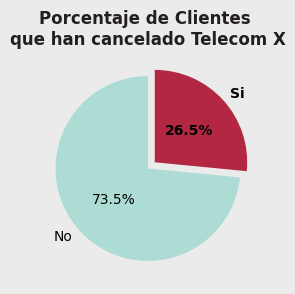

In [687]:
distribucion_cancelacion_viz().show();

## <font color='#0066CC'>Recuento de cancelación por variables categóricas</font>
---

Ahora, exploraremos cómo se distribuye la cancelación según variables categóricas, como género, tipo de contrato, método de pago, entre otras. 

Este análisis nos ayudará a definir el perfil de los clientes que cancelan su servicio. Para lo cual, usaremos un subset de datos que sólo contempla a dichos clientes, de ahora en adelante, **subset o DF de cancelados**.

In [688]:
telecom_x_cancelado = telecom_x_estandarizado[telecom_x_estandarizado['cancelacion'] == 1].drop(columns=['cliente_id', 'cancelacion']).copy().reset_index(drop=True)

telecom_x_cancelado.head()

,genero,adulto_mayor,pareja,dependientes,meses_antiguedad,servicio_telefonico,multiples_lineas,servicio_internet,seguridad_en_linea,copia_seguridad_en_linea,proteccion_dispositivos,soporte_tecnologico,streaming_tv,streaming_peliculas,contrato,factura_en_linea,metodo_pago,cargo_mensual,cargo_total,cuentas_diarias
0,Masculino,0,0,0,4,1,No,Fibra óptica,No,No,Si,No,No,No,Por mes,1,Cheque electrónico,73.9,280.85,2.46
1,Masculino,1,1,0,13,1,No,Fibra óptica,No,Si,Si,No,Si,Si,Por mes,1,Cheque electrónico,98.0,1237.85,3.27
2,Femenino,1,1,0,3,1,No,Fibra óptica,No,No,No,Si,Si,No,Por mes,1,Cheque por correo,83.9,267.40,2.80
3,Masculino,1,0,0,45,1,No,DSL,Si,No,Si,No,No,Si,Un año,0,Tarjeta de crédito (automático),62.7,2791.50,2.09
4,Masculino,1,0,0,1,0,Sin servicio de teléfono,DSL,No,No,No,No,No,No,Por mes,1,Cheque electrónico,25.1,25.10,0.84


### <font color='#003366'>'genero'</font>
---

In [689]:
telecom_x_cancelado.genero.value_counts()

genero
Femenino     939
Masculino    930
Name: count, dtype: int64

Podemos verificar que a simple vista el género del cliente no es un factor determinante para la cancelación del servicio, ya que no hay un sesgo muy evidente.

### <font color='#003366'>'multiples_lineas'</font>
---

In [690]:
telecom_x_cancelado.multiples_lineas.value_counts(normalize=True)

multiples_lineas
Si                          0.454789
No                          0.454254
Sin servicio de teléfono    0.090958
Name: proportion, dtype: float64

Podemos notar que la mayoría de clientes que cancelaron su servicio con Telecom X, al menos 90% contaban con línea telefónica, sin embargo, dentro de ese 90% no hay ningún sesgo considerable.

### <font color='#003366'>'servicio_internet'</font>
---

In [691]:
servicio_internet_df = telecom_x_cancelado.servicio_internet.value_counts()
servicio_internet_df

servicio_internet
Fibra óptica    1297
DSL              459
No               113
Name: count, dtype: int64

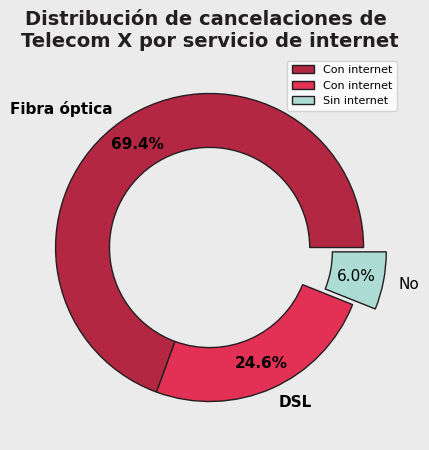

In [692]:
def servicio_internet_viz():
    plt.subplots(figsize=(7,5), facecolor=GRIS_1)

    patches, texts, autotexts = plt.pie(x=servicio_internet_df, explode=[0.0, 0.0, 0.15], labels=servicio_internet_df.index, colors=[ROJO_3, ROJO_1, AGUA_1], autopct='%1.1f%%', pctdistance=0.82, labeldistance=1.1, wedgeprops=dict(width=0.35, edgecolor= GRIS_5, linewidth=1), textprops={'fontsize': 11})

    plt.title(label='Distribución de cancelaciones de \nTelecom X por servicio de internet', fontdict={'fontsize':14, 'fontweight': 'bold', 'color': GRIS_5}, loc= 'center')

    texts[0].set_weight('bold')
    autotexts[0].set_weight('bold')
    texts[1].set_weight('bold')
    autotexts[1].set_weight('bold')

    plt.legend(['Con internet', 'Con internet', 'Sin internet'], loc='upper right', fontsize=8)

    return plt
servicio_internet_viz().show();

El 94% de los clientes contaban con alguna forma de internet antes de cancelar su servicio de Telecom X.

De ese 94% de clientes con internet, claramente el más popular era el sevicio de fibra óptica 

### <font color='#003366'>'seguridad_en_linea', 'copia_seguridad_en_linea' 'proteccion_dispositivos', 'soporte_tecnologico', 'streaming_tv', 'streaming_peliculas'</font>
---

Vamos a analizar estas columnas juntas debido a que todas son columnas derivadas del servicio de internet y que cuentan con los mismos registros: [‘Si’, ‘No’, ‘Sin servicio de internet’]. 

In [693]:
columnas_derivadas_internet

['seguridad_en_linea',
 'copia_seguridad_en_linea',
 'proteccion_dispositivos',
 'soporte_tecnologico',
 'streaming_tv',
 'streaming_peliculas']

Primero vamos a construir un DF en forma de tabla dinámica que nos permita graficar mejor: 

In [694]:
df_melted_internet = telecom_x_cancelado.melt(value_vars=columnas_derivadas_internet, var_name= 'columna_derivada_internet', value_name='valor')
df_melted_internet.head()

,columna_derivada_internet,valor
0,seguridad_en_linea,No
1,seguridad_en_linea,No
2,seguridad_en_linea,No
3,seguridad_en_linea,Si
4,seguridad_en_linea,No


In [695]:
df_pivot_internet = df_melted_internet.pivot_table(index='valor', columns='columna_derivada_internet', values='valor', aggfunc='size')
df_pivot_internet.head()

columna_derivada_internet,copia_seguridad_en_linea,proteccion_dispositivos,seguridad_en_linea,soporte_tecnologico,streaming_peliculas,streaming_tv
valor,,,,,,
No,1233,1211,1461,1446,938,942
Si,523,545,295,310,818,814
Sin servicio de internet,113,113,113,113,113,113


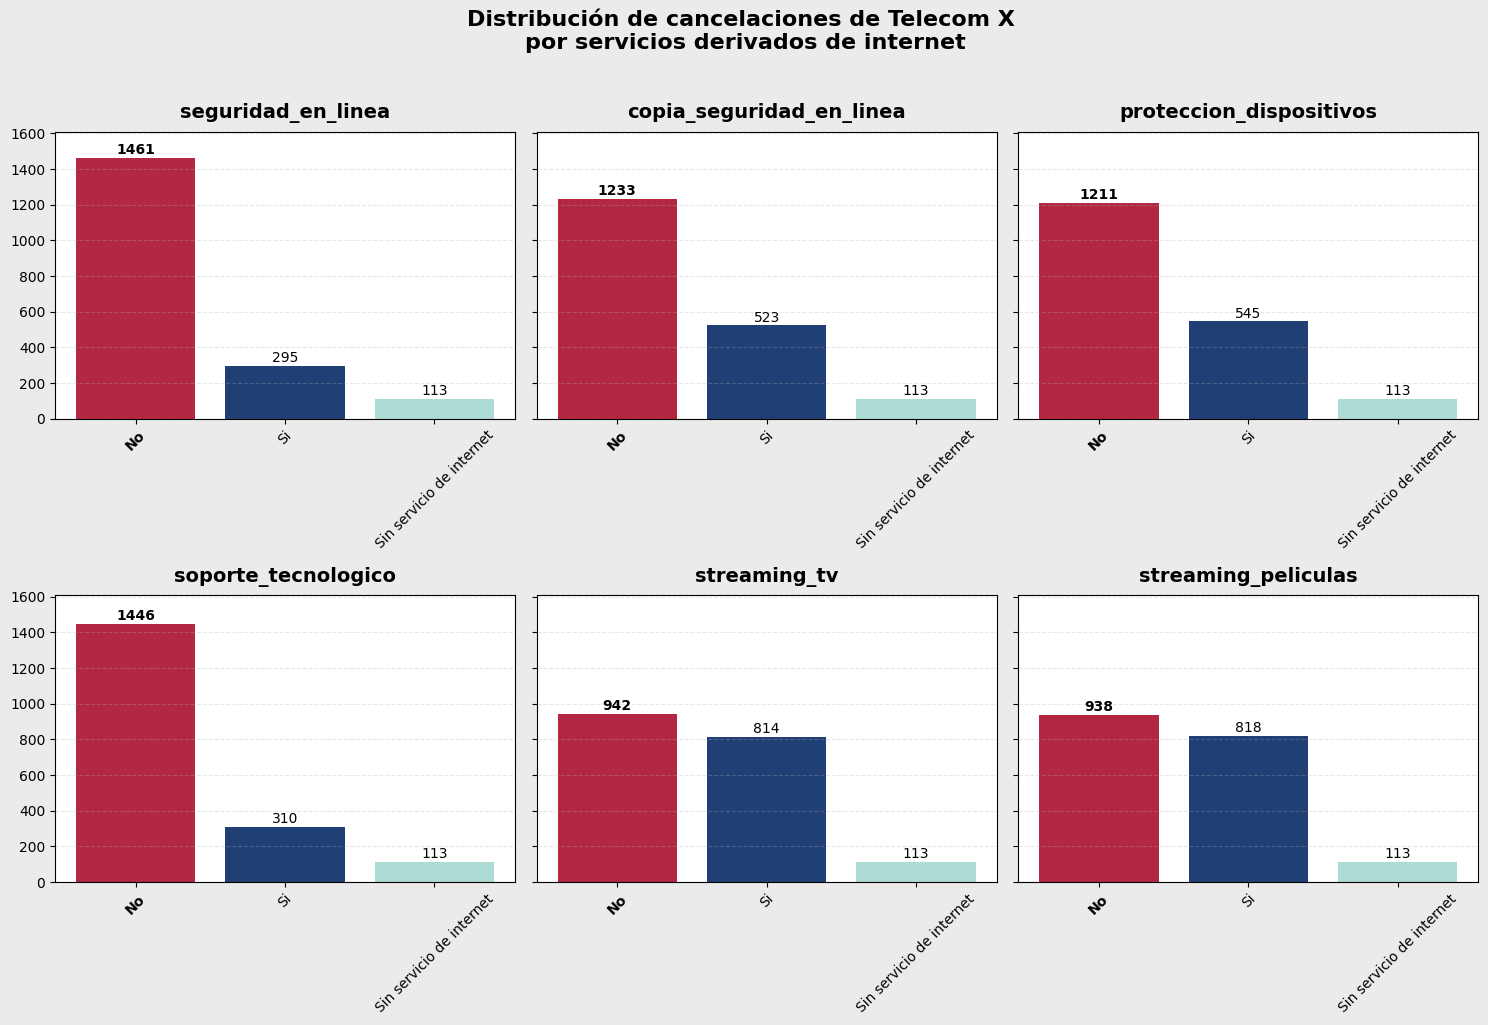

In [710]:
def columnas_derivadas_internet_viz():
    fig, axes = plt.subplots(2, 3, figsize=(15, 10), 
                            facecolor=GRIS_1, 
                            sharey=True)

    axes = axes.flatten()

    for i, col in enumerate(columnas_derivadas_internet):   
        ax = axes[i]
        datos = df_pivot_internet[col]

        bars = ax.bar(x=datos.index, height=datos.values, 
                    color=[ROJO_3, AZUL_1, AGUA_1])
        
        ax.set_title(label=col, fontsize=14, 
                    fontweight='bold', pad=10)
        
        ax.xaxis.set_tick_params(rotation=45,
                                labelsize=10,
                                labelrotation=45)

        for bar in bars:
            height = bar.get_height()         
            font_weight = 'bold' if height == datos.values.max() else 'normal'

            ax.text(x=bar.get_x() + bar.get_width()/2., y=height + 5,
                    s=str(height), ha='center', va='bottom', fontsize=10, fontweight=font_weight)
        
        ax.get_xticklabels()[0].set_fontweight('bold')
     
        ax.grid(axis='y', alpha=0.3, linestyle='--')

        ax.margins(y=0.1)

    fig.suptitle('Distribución de cancelaciones de Telecom X \npor servicios derivados de internet', 
                fontsize=16, fontweight='bold', y=1.02)

    plt.tight_layout()

    return plt

columnas_derivadas_internet_viz().show();

Podemos observar que **una tendencia general de los clientes que dejaron Telecom X es que la mayoría prefierio contratar internet, pero no contratar servicios extras**, siendo los menos populares: seguridad en línea y el soporte tecnológico, seguidos por: copia de seguridad en línea y protección de dispositivos; y con un sesgo menos marcado televisión y películas de streaming. 

### <font color='#003366'>'contrato'</font>
---

In [697]:
contrato_df = telecom_x_cancelado.contrato.value_counts()
contrato_df

contrato
Por mes     1655
Un año       166
Dos años      48
Name: count, dtype: int64

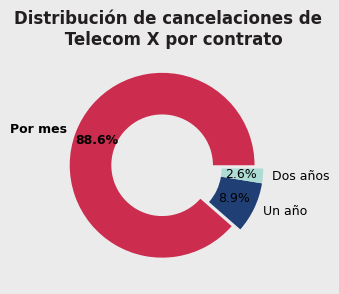

In [698]:
def contrato_viz():
    plt.subplots(figsize=(5,3), facecolor=GRIS_1)

    patches, texts, autotexts = plt.pie(x=contrato_df, explode=[0.1, 0.0, 0.0], labels=contrato_df.index, colors=[ROJO_2, AZUL_1, AGUA_1], autopct='%1.1f%%', pctdistance=0.76, labeldistance=1.1, wedgeprops=dict(width=0.45), textprops={'fontsize': 9})

    plt.title(label='Distribución de cancelaciones de \n Telecom X por contrato', fontdict={'fontsize':12, 'fontweight': 'bold', 'color': GRIS_5}, loc= 'center')

    texts[0].set_weight('bold')
    autotexts[0].set_weight('bold')

    return plt

contrato_viz().show();

Comprobamos que el contrato por mes es uno de los aspectos que definen al perfil del cliente que cancela. 

### <font color='#003366'>'metodo_pago'</font>
---

In [699]:
metodo_pago_df = telecom_x_cancelado.metodo_pago.value_counts()
metodo_pago_df

metodo_pago
Cheque electrónico                     1071
Cheque por correo                       308
Transferencia bancaria (automático)     258
Tarjeta de crédito (automático)         232
Name: count, dtype: int64

In [700]:
colors = [ROJO_2 if value == metodo_pago_df.values.max() else AGUA_1 for value in metodo_pago_df.values]
colors

['#cc2c4e', '#addcd4', '#addcd4', '#addcd4']

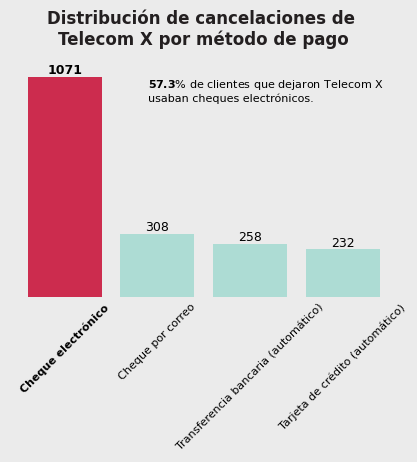

In [ ]:
def metodo_pago_viz():
    fig, ax = plt.subplots(figsize=(5,3), facecolor=GRIS_1)

    ax.bar(x=metodo_pago_df.index, height=metodo_pago_df, color=colors)

    ax.set_title(label='Distribución de cancelaciones de \nTelecom X por método de pago', fontdict={'fontsize':12, 'fontweight': 'bold', 'color': GRIS_5}, loc= 'center', pad=15)

    ax.set_frame_on(False)
    ax.yaxis.set_visible(False)

    ax.xaxis.set_tick_params(which='both', length=0, labelsize=8, labelrotation=45)

    for i, v in enumerate(metodo_pago_df.values):

        font_weight = 'bold' if v == metodo_pago_df.values.max() else 'normal'

        ax.text(x=i, y=v, s=str(v), color='black', fontsize=9, ha='center', va='bottom', fontweight = font_weight)

    ax.get_xticklabels()[0].set_fontweight('bold')

    total_clientes_cancelados = metodo_pago_df.sum()
    metodo_pago_df_max = metodo_pago_df.max()
    porcentaje = (metodo_pago_df_max*100/total_clientes_cancelados).round(2)

    insight = f'$\\bf{porcentaje}$% de clientes que dejaron Telecom X \nusaban cheques electrónicos.'

    ax.text(x=0.9, y=950, s=insight, fontsize=8)

    return plt

metodo_pago_viz().show();

Observamos que un poco más de la mitad de los clientes que cancelaron Telecom X, tenían como forma de pago el cheque electrónico.

# <strong><font color='#3399FF'>📄Informe final</font></strong> 
---